# Perceptron1

Now we want to mimic an AND logical function by a perceptron? The AND has 2 inputs that can either take the values 0 
or 1; so its function can be expressed by a truth table containg 2^2 == 4 entries. 
An AND only takes 1 (TRUE) as output if both inputs are 1 (TRUE).

Question now is how to model the AND function with a perceptron. Obviously we have to train the perceptron with all 
4 train samples with enough iterations (epochs).

At the end 2 exercises are included.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#import sklearn.linear_model.perceptron as p
from sklearn.linear_model import perceptron
 
# Needed to show the plots inline
%matplotlib inline

Get the data

In [11]:
# Data
d = np.array([
[0, 0, 1, 1],
[0, 1, 0, 1]
])
 
# Labels
t = np.array([0, 0, 0, 1])

Plot points

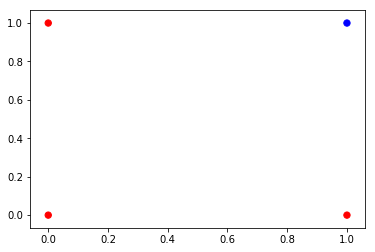

In [12]:
colormap = np.array(['r', 'b'])
plt.scatter(d[0], d[1], c=colormap[t], s=40)

In [13]:
# rotate the data 270 degrees
d90 = np.rot90(d)
d180 = np.rot90(d90)
d270 = np.rot90(d180)
 
# Create the model: train with d270!
net = perceptron.Perceptron(n_iter=20, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(d270,t)
 
# Print the results
print("Prediction " + str(net.predict(d270)))       # Use the model: infer with d270
print("Actual     " + str(t))
print("Accuracy   " + str(net.score(d270, t)*100) + "%")
d270

Prediction [0 0 0 1]
Actual     [0 0 0 1]
Accuracy   100.0%


C:\Users\nikla\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

Coefficient 0 0.006
Coefficient 1 0.004
Bias [-0.008]


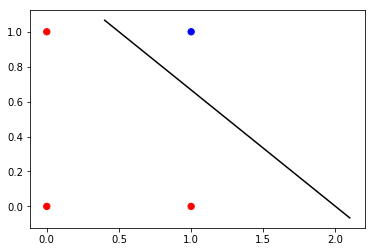

In [14]:
# Plot the original data
plt.scatter(d[0], d[1], c=colormap[t], s=40)
 
# Output the values
print("Coefficient 0 " + str(net.coef_[0,0]))
print("Coefficient 1 " + str(net.coef_[0,1]))
print("Bias " + str(net.intercept_))
 
# Calc the hyperplane (decision boundary)
ymin, ymax = plt.ylim()
w = net.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (net.intercept_[0]) / w[1]
 
# Plot the line
plt.plot(yy,xx, 'k-')

As can be seen the perceptron has successfully separated for the AND function the 3 False and the 1 True truth table entries.

In [ ]:
# Exercises
1. Question: if we reduce the number of iterations what would you think would happen with 'accuracy' and the separation line?
    At what threshold would a decreasing number of iterations fail the correct inference?
2. Do the same for the OR function. The OR function only has a 0 (FALSE) output if both the inputs are 0 (FALSE). 
See https://en.wikipedia.org/wiki/Boolean_algebra
3. Do the same for the XOR function.